# 逻辑斯谛回归

1. 以下关于最大似然估计的表述中正确的是：

**A.** 以概率为输出的模型常用最大似然估计得到损失函数。 

**B.** 由于最大似然估计优化的是对数似然而非似然，得到的结果只是最优解的近似。

**C.** 最大似然估计与交叉熵的训练目标不等价。 

**D.** 最大似然估计中引入了概率分布，所以不能采用梯度下降法来优化最大似然估计导出的损失函数。

## 解答过程

**A.** 以概率为输出的模型常用最大似然估计得到损失函数。

- 判断：对。

- 依据：文章 6.2 节明确指出，逻辑斯谛回归模型通过最大似然估计（MLE）推导损失函数。具体来说，模型假设样本类别服从伯努利分布，通过最大化似然函数（即预测正确概率的乘积）得到参数优化目标。最大似然估计的核心思想是：以概率为输出的模型（如逻辑斯谛回归），通过调整参数使模型在训练数据上的预测概率最大，从而得到损失函数。

**B.** 由于最大似然估计优化的是对数似然而非似然，得到的结果只是最优解的近似。

- 判断：错。

- 依据：文章 6.2 节提到，取对数是为了将连乘形式的似然函数转化为求和形式，便于计算和优化。对数函数是单调递增的，因此优化对数似然与优化原似然函数的结果完全等价，不存在近似。逻辑斯谛回归的损失函数是凸函数，梯度下降法能收敛到全局最优解（见 6.2 节末尾）。

**C.** 最大似然估计与交叉熵的训练目标不等价。

- 判断：错。

- 依据：文章 6.5 节明确推导了最大似然估计与交叉熵的等价性。对于二分类问题，对数似然函数的最大化等价于交叉熵的最小化。

- 推导过程：

对数似然函数为：

$$\ell(\theta) = \sum_{i=1}^n \left[ y_i \log \sigma(x_i^T \theta) + (1 - y_i) \log \left(1 - \sigma(x_i^T \theta)\right) \right]$$

交叉熵损失函数为：

$$H(p, q) = -\sum_{i=1}^n p(x_i) \log q(x_i)$$

当$ p(x_i) $为真实分布（即$ y_i，q(x_i) $）为模型预测概率$ \sigma(x_i^T \theta) $时，交叉熵与对数似然函数的负值等价。因此，最大化对数似然等价于最小化交叉熵。

**D.** 最大似然估计中引入了概率分布，所以不能采用梯度下降法来优化最大似然估计导出的损失函数。

- 判断：错。

- 依据：文章 6.2 节和 6.4 节详细展示了梯度下降法在逻辑斯谛回归中的应用。如，通过对对数似然函数求导，得到梯度更新公式：

$$\theta \leftarrow \theta - \alpha \left[ -X^T \left( y - \sigma(X\theta) \right) + \lambda \theta \right]$$

逻辑斯谛回归的损失函数是凸函数，梯度下降法可保证收敛到全局最优解（见 6.2 节末尾）。

___

2. 以下关于分类问题的说法中不正确的是： 

**A.** 分类问题中，最后往往需要通过阈值来决定样本最后的标签。对于标签为 0 或 1 的二分类问题，当$f_{\theta}(x)$的数值大于 0.5 时即可认为标签为 1，反之亦然。 

**B.** 如果使用确定性模型，将会导致模型对于参数无法微分，因此我们需要使用概率模型来建模问题。 

**C.** 对于多分类问题，在设计损失函数时仍然可以采用交叉熵损失。如果有$k$个类别，损失函数就是每一类的损失相乘。 

**D.** softmax 函数可以看作是逻辑斯谛函数在多分类情况下的延伸，因此也可以用 softmax 函数作为二分类问题的损失函数。

## 解答过程

**A.** 分类问题中，最后往往需要通过阈值来决定样本最后的标签。对于标签为0或1的二分类问题，当的数值大于0.5时即可认为标签为1，反之亦然。

- 判断：对。

- 依据：文章6.3节指出，分类问题中通常需要设定阈值（如0.5）将概率转化为离散标签。例如，逻辑斯谛回归的输出概率大于0.5时预测为正类（标签1），否则为负类（标签0）。

**B.** 如果使用确定性模型，将会导致模型对于参数无法微分，因此我们需要使用概率模型来建模问题。**

- 判断：对。

- 依据：文章6.1节提到，硬分类（如直接使用阈值判断）会导致函数在阈值处不可导（如阶跃函数），因此需要概率模型（如逻辑斯谛函数）来保证可导性，从而支持梯度下降优化。

**C.** 对于多分类问题，在设计损失函数时仍然可以采用交叉熵损失。如果有个类别，损失函数就是每一类的损失相乘。**

- 判断：错。

- 依据：文章6.5节明确说明，多分类问题的交叉熵损失是**相加**而非相乘。具体来说，对于每个样本，其损失是各个类别的交叉熵之和：
    $$\text{交叉熵损失} = -\sum_{i=1}^K y_i \log \sigma(z_i)$$
    其中，$ K $ 是类别数，$ y_i $ 是样本真实类别（0或1），$ \sigma(z_i) $ 是模型预测的概率。

**D.** softmax函数可以看作是逻辑斯谛函数在多分类情况下的延伸，因此也可以用softmax函数作为二分类问题的损失函数。**

- 判断：对。

- 依据：文章6.2节指出，当 $ K=2 $ 时，softmax函数退化为逻辑斯谛函数。例如，二分类的softmax可以表示为：
    $$\sigma(z_1) = \frac{e^{z_1}}{e^{z_1} + e^{z_2}}, \quad \sigma(z_2) = 1 - \sigma(z_1)$$
    这与逻辑斯谛函数的形式一致。因此，softmax函数确实可以用于二分类问题。

___

3. 以下关于分类问题评价指标的说法，不正确的是：

**A.** 精确率是指分类正确的样本占全体样本的比例。 

**B.** 准确率是指分类为正例的样本中标签为正例的比例。 

**C.** 召回率是指标签为正例的样本中分类为正例的比例。 

**D.** AUC 是由阈值从小到大增加过程中，模型分类的假阳性率以及真阳性率变化趋势进行绘制的。

## 解题过程

**A.** 精确率是指分类正确的样本占全体样本的比例。

- 判断：错。

- 依据：精确率（Precision）的标准定义是：**正确分类的正例样本数**占**所有被分类为正例的样本数**的比例，即：
$$\text{精确率} = \frac{\text{TP}}{\text{TP} + \text{FP}}$$
  而选项A描述的是**准确率（Accuracy）**的定义，即：
$$\text{准确率} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}$$

**B.** 准确率是指分类为正例的样本中标签为正例的比例。

- 判断：错。

- 依据：准确率（Accuracy）的定义如选项A所述，是正确分类的样本占全体样本的比例。选项B描述的是**精确率（Precision）**的定义，而非准确率。

**C.** 召回率是指标签为正例的样本中分类为正例的比例。

- 判断：对。

- 依据：召回率（Recall）的标准定义是：**正确分类的正例样本数**占**所有实际为正例的样本数**的比例，即：
$$\text{召回率} = \frac{\text{TP}}{\text{TP} + \text{FN}}$$

**D.** AUC 是由阈值从小到大增加过程中，模型分类的假阳性率以及真阳性率变化趋势进行绘制的。

- 判断：对。

- 依据：验证：AUC（Area Under Curve）是ROC曲线下的面积，而ROC曲线的横轴为假阳性率（FPR），纵轴为真阳性率（TPR）。随着分类阈值从高到低变化，FPR和TPR会形成ROC曲线。

___

4. 逻辑斯谛回归虽然引入了非线性的逻辑斯谛函数，但通常仍然被视为线性模型，试从模型参数化假设的角度解释原因。

## 解答

逻辑斯谛回归的非线性仅体现在输入到概率的映射（逻辑斯谛函数），但其核心参数化假设是线性的：模型通过线性组合参数 $\mathbf{w}$ 和输入特征 $\mathbf{x}$ 得到线性决策边界 $\mathbf{w}^T \mathbf{x} + b$，并基于此进行分类。尽管逻辑斯谛函数引入了非线性变换，但参数 $\mathbf{w}$ 和 $b$ 始终以线性方式参与运算，因此模型本质上仍属于线性模型。


___

5. 如果某模型的 AUC 低于 0.5，是否有办法立即得到一个 AUC 高于 0.5 的模型？


## 解答

根据文章内容，若模型的AUC低于0.5，只需**反转模型的预测结果**（例如将正类概率视为负类概率，或直接取反预测标签），即可立即得到一个AUC为$1-\text{原AUC}$的模型。这是因为AUC的计算基于预测概率的排序，反转排序会使ROC曲线对称地位于对角线另一侧，从而将AUC提升至高于0.5的水平。

___

6. 对于一个二分类任务，数据的标签和对于预测正例的概率如下表所示，试画出 ROC 曲线并计算模型的 AUC 值。  

表 6-4 习题 6 概率表  

|  $n_1$  |  $n_2$  |  $n_3$  |  $n_4$  |  $p_1$  |  $p_2$  |  $p_3$  |  $p_4$  |
| ------- | ------- | ------- | ------- | ------- | ------- | ------- | ------- |
| 0.15    | 0.21    | 0.74    | 0.45    | 0.71    | 0.48    | 0.52    | 0.34    |

AUC值为：0.25


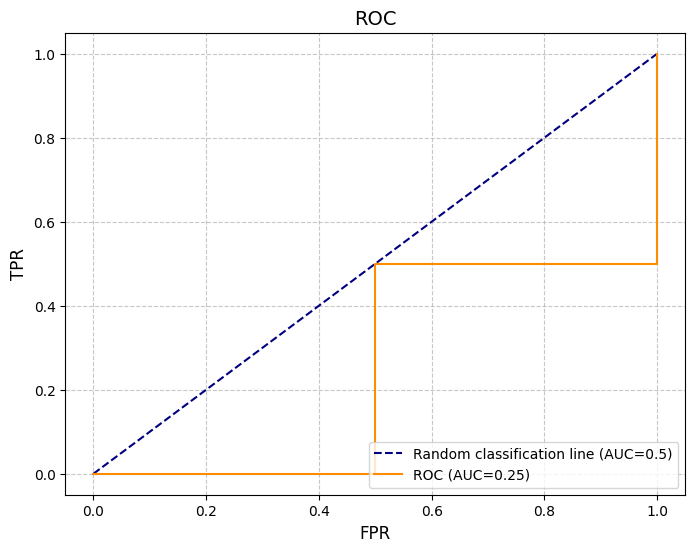

In [5]:
import numpy as np
import matplotlib.pyplot as plt

y_true = np.array([0, 0, 1, 1])  # 手动转换为0/1标签
y_pred = np.array([0.71, 0.48, 0.52, 0.34])  # 预测概率

def calculate_roc_auc(y_true, y_pred):
    """
    计算ROC曲线和AUC值
    
    参数:
    y_true -- 真实标签（0/1）
    y_pred -- 预测为正类的概率
    
    返回:
    auc -- AUC值
    fpr -- 假阳性率数组
    tpr -- 真阳性率数组
    """
    # 1. 按预测概率从高到低排序
    sorted_indices = np.argsort(y_pred)[::-1]  # 降序排列索引
    y_true_sorted = y_true[sorted_indices]    # 排序后的真实标签
    y_pred_sorted = y_pred[sorted_indices]    # 排序后的预测概率

    # 2. 计算累积真阳性（TP）和假阳性（FP）
    tp = np.cumsum(y_true_sorted)  # 累计真实正类数量
    fp = np.cumsum(1 - y_true_sorted)  # 累计被误判为正类的负类数量

    # 3. 计算真阳性率（TPR）和假阳性率（FPR）
    tpr = tp / tp[-1] if tp[-1] != 0 else np.zeros_like(tp)  # 防止除以0
    fpr = fp / fp[-1] if fp[-1] != 0 else np.zeros_like(fp)

    # 4. 添加初始点(0,0)，对应阈值为无穷大时的情况
    tpr = np.concatenate([[0], tpr])  # 添加起始点
    fpr = np.concatenate([[0], fpr])

    # 5. 计算AUC（使用梯形法）
    auc = 0.0
    for i in range(1, len(fpr)):
        auc += (fpr[i] - fpr[i-1]) * tpr[i]  # 计算每个梯形面积并累加

    return auc, fpr, tpr

# 计算ROC和AUC
roc_auc, fpr, tpr = calculate_roc_auc(y_true, y_pred)
print(f"AUC值为：{roc_auc:.2f}")

# 绘制ROC曲线
plt.figure(figsize=(8, 6))

# 绘制随机分类线（对角线）
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random classification line (AUC=0.5)')

# 绘制模型的ROC曲线
plt.plot(fpr, tpr, color='darkorange', label=f'ROC (AUC={roc_auc:.2f})')

# 添加坐标轴标签和标题
plt.xlabel('FPR', fontsize=12)#假阳性率 (FPR)
plt.ylabel('TPR', fontsize=12)#真阳性率 (TPR)
plt.title('ROC', fontsize=14)#受试者工作特征曲线 (ROC)

# 添加图例和网格
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# 显示图形
plt.show()

___

7. 设数据集中包含样本$x_1, \dots, x_N$，其中有$M$个正样本，$N-M$个负样本。模型$\hat{f}$预测任意两个不同样本$x_i, x_j$属于正类的概率$\hat{f}(x_i)$与$\hat{f}(x_j)$不同。证明从中均匀随机选取一个正样本$p$和一个负样本$n$，有  
$$P(\hat{f}(n) < \hat{f}(p)) = \text{AUC}(\hat{f})$$  
（提示：考虑 ROC 曲线上每一段横线和竖线的意义。对于选出的负样本$n$，预测值更大的正样本数量和TPR有什么关系？FPR呢？）

## 解答

推导过程如下：

**1.** 样本排序与ROC曲线构造
将全体样本按模型预测值$\hat{f}(x)$从高到低排序。ROC曲线的横轴为FPR（False Positive Rate），纵轴为TPR（True Positive Rate）。遍历排序后的样本时：
- 遇到正样本，TPR增加$\frac{1}{M}$（纵轴上升）。
- 遇到负样本，FPR增加$\frac{1}{N - M}$（横轴右移），并在此时记录当前TPR值。

**2.** AUC的计算
AUC是ROC曲线下的面积，由一系列小矩形面积累加得到。每个负样本对应一个横轴步长$\frac{1}{N - M}$，其高度为当前TPR值。因此，AUC可表示为：
\[AUC = \sum_{负样本n}(当前TPR\times\frac{1}{N - M})\]

**3.** 当前TPR与正样本数量关系
当处理到负样本$n$时，当前TPR等于已遍历的正样本数量$T_{n}$除以$M$，即：
\[当前TPR = \frac{T_{n}}{M}\]
这里$T_{n}$是排在$n$之前的正样本数量，即满足$\hat{f}(p)>\hat{f}(n)$的正样本$p$的数量。

**4.** 将AUC转换为正负对比较
将每个负样本$n$的贡献代入AUC公式：
$$AUC=\sum_{n}(\frac{T_{n}}{M}\times\frac{1}{N - M})=\frac{1}{M(N - M)}\sum_{n}T_{n}$$
其中$\sum_{n}T_{n}$为所有负样本$n$前正样本的总数，即满足$\hat{f}(p)>\hat{f}(n)$的正负对总数。

**5.** 概率与AUC的等价性
正负对总数为$M(N - M)$，因此正确对的比例为：
$$P(\hat{f}(n)<\hat{f}(p))=\frac{\sum_{n}T_{n}}{M(N - M)}$$
结合AUC的表达式，得：
$$P(\hat{f}(n)<\hat{f}(p)) = AUC$$ 

___

8. 对于$k$分类 softmax 函数，试推导其中一个分类的逻辑斯谛值总可以设为 0，进而$k$分类逻辑斯谛回归模型其实只需要使用$k-1$个参数向量即可完成等价建模，而具体的二分类逻辑斯谛回归的形式则正是 softmax 函数在$k=2$时由这样化简得到的。

## 解答

**推导过程：**

**1.** softmax函数的原始形式  
   对于$k$个类别，softmax函数定义为：
   $$
   p(y=i \mid \mathbf{x}) = \frac{\exp(z_i)}{\sum_{j=1}^k \exp(z_j)}, \quad z_i = \mathbf{w}_i^T \mathbf{x} + b_i
   $$
   其中$\mathbf{w}_i$和$b_i$是第$i$类的参数向量和偏置。

**2.** 固定参考类别参数  
   选择第$k$类作为参考类别，设其参数为$\mathbf{w}_k = \mathbf{0}$，$b_k = 0$，则$z_k = 0$。此时，其他类别的概率可表示为：
   $$
   p(y=i \mid \mathbf{x}) = \frac{\exp(z_i)}{\sum_{j=1}^{k-1} \exp(z_j) + 1}, \quad i=1,2,\dots,k-1
   $$

**3.** 参数等价性证明  
   定义新参数$\mathbf{w}_i' = \mathbf{w}_i - \mathbf{w}_k$，$b_i' = b_i - b_k$，则：
   $$
   z_i' = \mathbf{w}_i'^T \mathbf{x} + b_i' = (\mathbf{w}_i - \mathbf{w}_k)^T \mathbf{x} + (b_i - b_k) = z_i - z_k
   $$
   代入原概率公式：
   $$
   p(y=i \mid \mathbf{x}) = \frac{\exp(z_i' + z_k)}{\sum_{j=1}^k \exp(z_j' + z_k)} = \frac{\exp(z_i')}{\sum_{j=1}^{k-1} \exp(z_j') + 1}
   $$
   这表明固定$\mathbf{w}_k = \mathbf{0}$，$b_k = 0$后，模型参数减少为$\mathbf{w}_1', \dots, \mathbf{w}_{k-1}'$和$b_1', \dots, b_{k-1}'$，共$k-1$个参数向量。

4. **二分类特例**  
   当$k=2$时，设第2类参数为$\mathbf{w}_2 = \mathbf{0}$，$b_2 = 0$，则：
   $$
   p(y=1 \mid \mathbf{x}) = \frac{\exp(z_1)}{\exp(z_1) + 1} = \sigma(z_1)
   $$
   这正是二分类逻辑斯谛函数的形式，其中$z_1 = \mathbf{w}_1^T \mathbf{x} + b_1$。


___

9. 从二分类到多分类

(1) 推导softmax函数$\sigma(z)$对$z$的梯度。

(2) 将$\sigma(z)$作为模型预测的概率分布，分别用MLE（极大似然估计）和交叉熵计算$K$分类问题的损失函数。两者的结果是否相同?

(3) 利用 (1) 和 (2) 的结果实现多分类的梯度下降算法，并在 `multiclass.csv` 数据集上测试。该数据集每一行包含 3 个数字，依次为样本的$x$坐标、$y$坐标和标签。数据分布如图 6-8 所示。 

## 解答

**(1)** softmax函数梯度推导
softmax函数定义为：
$$
\sigma(z_i) = \frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}}
$$
其对任意$z_j$的梯度为：
$$
\frac{\partial \sigma(z_i)}{\partial z_j} = \begin{cases} 
\sigma(z_i)(1 - \sigma(z_i)) & \text{当 } i = j, \\
-\sigma(z_i)\sigma(z_j) & \text{当 } i \neq j.
\end{cases}
$$

**推导过程：**
1. **当$i = j$时**：
   $$
   \frac{\partial \sigma(z_i)}{\partial z_i} = \frac{e^{z_i} \sum_{j=1}^K e^{z_j} - e^{z_i} \cdot e^{z_i}}{\left(\sum_{j=1}^K e^{z_j}\right)^2} = \sigma(z_i) \left(1 - \sigma(z_i)\right).
   $$

2. **当$i \neq j$时**：
   $$
   \frac{\partial \sigma(z_i)}{\partial z_j} = \frac{0 - e^{z_i} \cdot e^{z_j}}{\left(\sum_{j=1}^K e^{z_j}\right)^2} = -\sigma(z_i)\sigma(z_j).
   $$

**(2)** 损失函数的等价性

**极大似然估计（MLE）的损失函数**：  

假设数据独立同分布，似然函数为：
$$
L(\theta) = \prod_{n=1}^N \prod_{k=1}^K \sigma(z_k^{(n)})^{y_k^{(n)}},
$$

其中$y_k^{(n)}$为样本$n$的独热编码标签。取对数后：
$$
\ln L(\theta) = \sum_{n=1}^N \sum_{k=1}^K y_k^{(n)} \ln \sigma(z_k^{(n)}).
$$

负对数似然损失为：
$$
\mathcal{L}_{\text{MLE}} = -\sum_{n=1}^N \sum_{k=1}^K y_k^{(n)} \ln \sigma(z_k^{(n)}).
$$

**交叉熵损失函数**：  

交叉熵定义为：

$$
\mathcal{L}_{\text{CE}} = -\sum_{n=1}^N \sum_{k=1}^K y_k^{(n)} \ln \sigma(z_k^{(n)}).
$$

**等价性分析**：  
两者形式完全一致，因为：
- MLE通过最大化似然函数等价于最小化负对数似然。
- 交叉熵损失是基于真实分布$y$和预测分布$\sigma(z)$的信息差异。

**注:**  
对于多分类问题，MLE和交叉熵损失的表达式相同，均为：
$$
\mathcal{L} = -\sum_{n=1}^N \sum_{k=1}^K y_k^{(n)} \ln \sigma(z_k^{(n)}).
$$

Epoch 0, Loss: 0.6050
Epoch 100, Loss: 2.1245
Epoch 200, Loss: 2.1245
Epoch 300, Loss: 2.1245
Epoch 400, Loss: 2.1245
Epoch 500, Loss: 2.1245
Epoch 600, Loss: 2.1245
Epoch 700, Loss: 2.1245
Epoch 800, Loss: 2.1245
Epoch 900, Loss: 2.1245

训练准确率: 0.7300


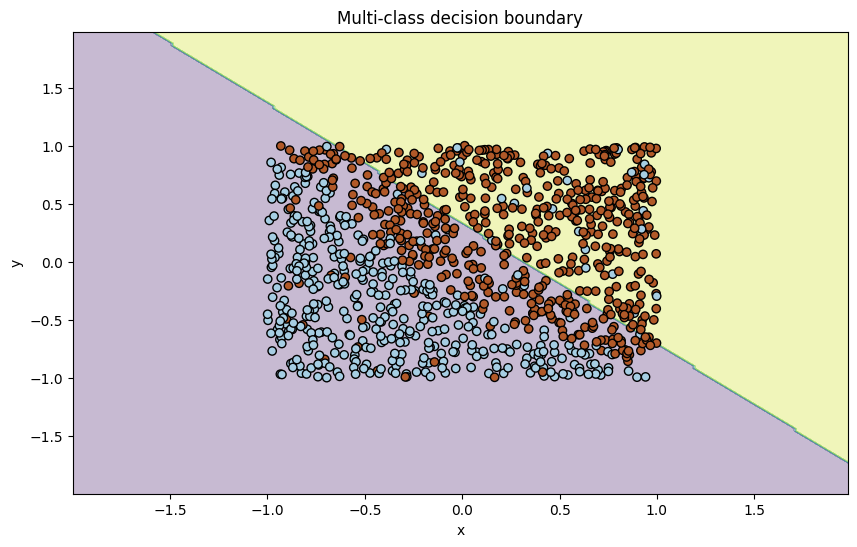

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 数据加载与预处理
data = np.loadtxt("./lr_dataset.csv", delimiter=',')
X = data[:, :2]  # 特征：x, y坐标
y = data[:, 2].astype(int)  # 标签
K = len(np.unique(y))  # 类别数
y_onehot = np.eye(K)[y]  # 独热编码

# 2. 参数初始化
D = X.shape[1]  # 特征维度
W = np.random.randn(D, K-1)  # K-1个参数向量（问题8结论）
b = np.zeros(K-1)  # 偏置项

# 3. 超参数设置
learning_rate = 0.1
max_iter = 1000
loss_history = []

# 4. 训练循环
for epoch in range(max_iter):
    # 前向传播
    z = X.dot(W) + b  # (N, K-1)
    z = np.hstack([z, np.zeros((X.shape[0], 1))])  # 添加参考类别z=0
    z_max = np.max(z, axis=1, keepdims=True)  # 数值稳定性
    exp_z = np.exp(z - z_max)
    probs = exp_z / np.sum(exp_z, axis=1, keepdims=True)
    
    # 计算损失
    loss = -np.mean(np.sum(y_onehot * np.log(probs + 1e-8), axis=1))
    loss_history.append(loss)
    
    # 反向传播
    dz = probs - y_onehot  # 梯度对z的导数
    dW = X.T.dot(dz[:, :K-1])  # 前K-1类的梯度
    db = np.sum(dz[:, :K-1], axis=0)
    
    # 参数更新
    W -= learning_rate * dW
    b -= learning_rate * db
    
    # 打印训练过程
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss:.4f}')

# 5. 评估模型
z_pred = X.dot(W) + b
z_pred = np.hstack([z_pred, np.zeros((X.shape[0], 1))])
probs_pred = np.exp(z_pred - np.max(z_pred, axis=1, keepdims=True))
probs_pred /= np.sum(probs_pred, axis=1, keepdims=True)
y_pred = np.argmax(probs_pred, axis=1)
accuracy = np.mean(y_pred == y)
print(f'\n训练准确率: {accuracy:.4f}')

# 6. 可视化决策边界
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X_grid = np.c_[xx.ravel(), yy.ravel()]

# 预测网格点
z_grid = X_grid.dot(W) + b
z_grid = np.hstack([z_grid, np.zeros((X_grid.shape[0], 1))])
probs_grid = np.exp(z_grid - np.max(z_grid, axis=1, keepdims=True))
probs_grid /= np.sum(probs_grid, axis=1, keepdims=True)
y_grid = np.argmax(probs_grid, axis=1).reshape(xx.shape)

# 绘制结果
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, y_grid, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Multi-class decision boundary')
plt.show()

___

10. 关于随机变量$X$存在两个概率分布$p(x)$和$q(x)$，证明其KL散度总为非负，即$D_{KL}(p||q) \geq 0$，并且当且仅当$p(x) = q(x)$时，$D_{KL}(p||q) = 0$。 

## 解答

根据KL散度的定义，其表达式为：
$$
D_{KL}(p||q) = \int p(x) \log \frac{p(x)}{q(x)} \, dx.
$$

为证明其非负性，考虑凹函数$\log t$。根据Jensen不等式，对任意随机变量$T$有：
$$
\mathbb{E}[-\log T] \geq -\log \mathbb{E}[T].
$$
令$T = \frac{q(X)}{p(X)}$，其中$X \sim p(x)$，则：
$$
\mathbb{E}_p\left[-\log \frac{q(X)}{p(X)}\right] \geq -\log \mathbb{E}_p\left[\frac{q(X)}{p(X)}\right].
$$
左边化简为：
$$
\mathbb{E}_p\left[\log \frac{p(X)}{q(X)}\right] = D_{KL}(p||q),
$$
右边由于$\mathbb{E}_p\left[\frac{q(X)}{p(X)}\right] = \int q(x) \, dx = 1$，故$\log 1 = 0$。因此：
$$
D_{KL}(p||q) \geq 0.
$$
当且仅当$\frac{q(X)}{p(X)}$为常数时等号成立。结合概率归一性$\int p(x) \, dx = \int q(x) \, dx = 1$，该常数必为1，即$p(x) = q(x)$。综上，KL散度非负且当且仅当两分布相等时取零。